### Import Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load data and check shape, info, missing values and duplicates

In [72]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

#Loading the data
data= pd.read_csv("habsos.csv", low_memory=False)

In [73]:
#Filtering data for Florida

data= data[data["STATE_ID"]== "FL"].reset_index(drop=True)

In [74]:
#Checking first 5 rows of the data
data.head(5)

,STATE_ID,DESCRIPTION,Unnamed: 2,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,CELLCOUNT_UNIT,CELLCOUNT_QA,SALINITY,SALINITY_UNIT,SALINITY_QA,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA,OBJECTID,Unnamed: 27
0,FL,off New Smyrna Beach; Atlantic,NaN,29.1746,-78.2789,1990/12/20,NaN,0.5,Karenia,brevis,not observed,0,cells/L,1.0,NaN,NaN,9,24.2,deg. C,1,NaN,NaN,9,NaN,NaN,9,1590299,NaN
1,FL,off Daytona Beach; Atlantic,NaN,28.9822,-78.3590,1990/12/20,NaN,0.5,Karenia,brevis,very low,5,cells/L,1.0,NaN,NaN,9,25.9,deg. C,1,NaN,NaN,9,NaN,NaN,9,1590298,NaN
2,FL,off Daytona Beach; Atlantic,NaN,29.0000,-78.4700,1991/08/19,10:52,0.5,Karenia,brevis,not observed,0,cells/L,1.0,NaN,NaN,9,30.0,deg. C,1,NaN,NaN,9,NaN,NaN,9,1644042,NaN
3,FL,off Cape Canaveral; Atlantic,NaN,28.5350,-78.5570,1990/12/20,NaN,0.5,Karenia,brevis,very low,3,cells/L,1.0,NaN,NaN,9,24.0,deg. C,1,NaN,NaN,9,NaN,NaN,9,1590297,NaN
4,FL,off Cape Canaveral; Atlantic,NaN,28.1060,-78.8310,1990/12/21,NaN,0.5,Karenia,brevis,not observed,0,cells/L,1.0,NaN,NaN,9,24.9,deg. C,1,NaN,NaN,9,NaN,NaN,9,1590306,NaN


In [75]:
#Checking the number of columns and rows in the data
data.shape

(205168, 28)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATE_ID         205168 non-null  object 
 1   DESCRIPTION      205160 non-null  object 
 2   Unnamed: 2       0 non-null       float64
 3   LATITUDE         205168 non-null  float64
 4   LONGITUDE        205168 non-null  float64
 5   SAMPLE_DATE      205168 non-null  object 
 6   SAMPLE_TIME      158433 non-null  object 
 7   SAMPLE_DEPTH     204490 non-null  float64
 8   GENUS            205168 non-null  object 
 9   SPECIES          205168 non-null  object 
 10  CATEGORY         205168 non-null  object 
 11  CELLCOUNT        205168 non-null  int64  
 12  CELLCOUNT_UNIT   205168 non-null  object 
 13  CELLCOUNT_QA     205168 non-null  float64
 14  SALINITY         103421 non-null  float64
 15  SALINITY_UNIT    103421 non-null  object 
 16  SALINITY_QA      205168 non-null  int6

In [77]:
#Checking for missing values

data.isna().sum()

STATE_ID                0
DESCRIPTION             8
Unnamed: 2         205168
LATITUDE                0
LONGITUDE               0
SAMPLE_DATE             0
SAMPLE_TIME         46735
SAMPLE_DEPTH          678
GENUS                   0
SPECIES                 0
CATEGORY                0
CELLCOUNT               0
CELLCOUNT_UNIT          0
CELLCOUNT_QA            0
SALINITY           101747
SALINITY_UNIT      101747
SALINITY_QA             0
WATER_TEMP         102896
WATER_TEMP_UNIT    102896
WATER_TEMP_QA           0
WIND_DIR           205168
WIND_DIR_UNIT      205168
WIND_DIR_QA             0
WIND_SPEED         205168
WIND_SPEED_UNIT    205168
WIND_SPEED_QA           0
OBJECTID                0
Unnamed: 27        205168
dtype: int64

In [78]:
#Percentage of missing values for each column

data.isna().mean().sort_values(ascending=False)*100

Unnamed: 27        100.000000
Unnamed: 2         100.000000
WIND_SPEED_UNIT    100.000000
WIND_SPEED         100.000000
WIND_DIR_UNIT      100.000000
WIND_DIR           100.000000
WATER_TEMP_UNIT     50.152070
WATER_TEMP          50.152070
SALINITY_UNIT       49.592042
SALINITY            49.592042
SAMPLE_TIME         22.778893
SAMPLE_DEPTH         0.330461
DESCRIPTION          0.003899
CATEGORY             0.000000
OBJECTID             0.000000
WIND_SPEED_QA        0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
WIND_DIR_QA          0.000000
SAMPLE_DATE          0.000000
WATER_TEMP_QA        0.000000
CELLCOUNT            0.000000
GENUS                0.000000
SALINITY_QA          0.000000
SPECIES              0.000000
CELLCOUNT_QA         0.000000
CELLCOUNT_UNIT       0.000000
STATE_ID             0.000000
dtype: float64

<Axes: >

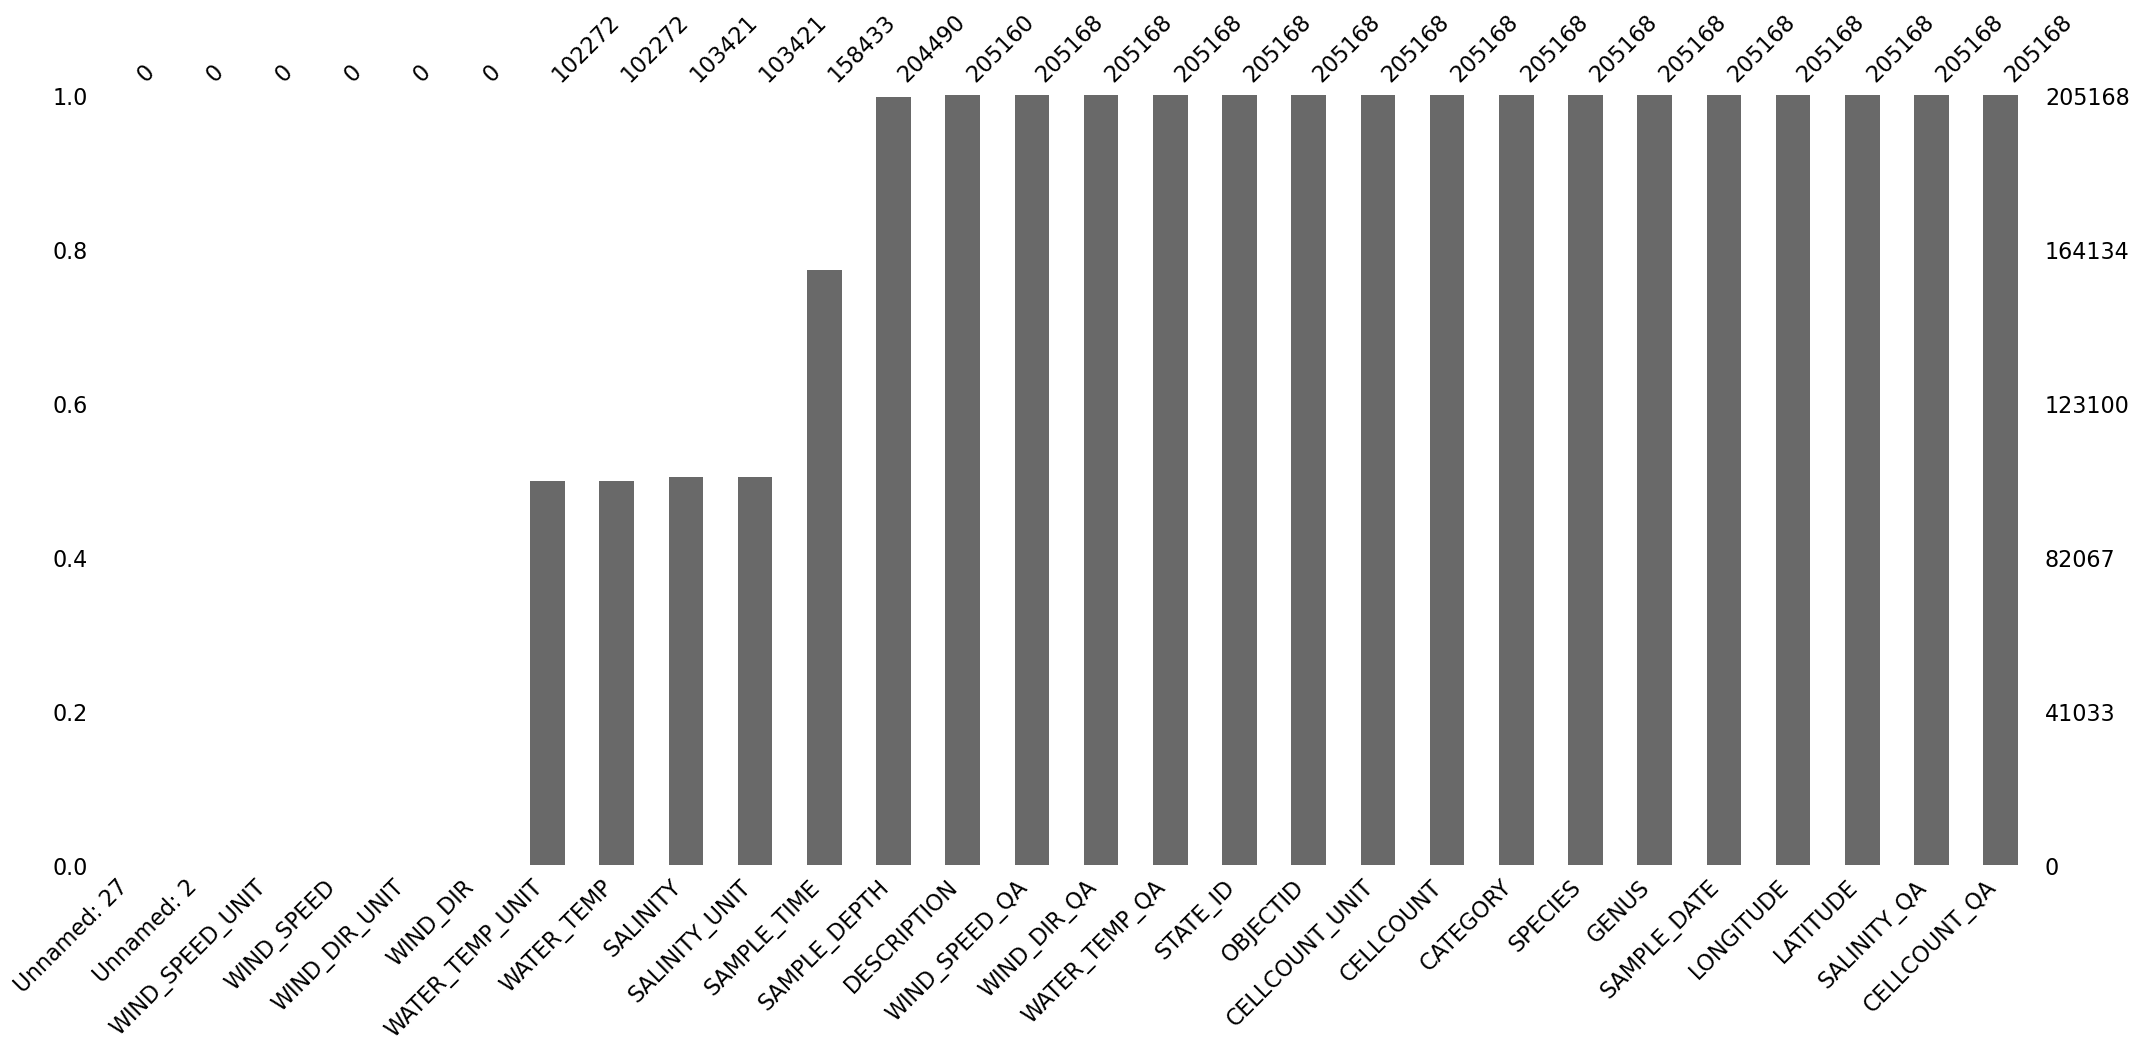

In [79]:
#Plot of Missing data per column
msno.bar(data, sort="ascending")

#### Columns that need to be dropped:
- Unnamed: 27 (100% missing values)
- Unnamed: 2 (100% missing values)
- WIND_DIR (100% missing values)
- WIND_DIR_UNIT (Unit of measurement, deg)
- WIND_DIR_QA (Data quality flag)
- CELLCOUNT_UNIT (Unit of measurement, cells/L)
- CELLCOUNT_QA (Data quality flag)
- SALINITY_UNIT (Unit of measurement, ppt)
- SALINITY_QA (Data quality flag)
- WIND_SPEED (100% missing values)
- WIND_SPEED_UNIT (Unit of measurement, mph)
- WIND_SPEED_QA (Data quality flag)
- WATER_TEMP_UNIT (Unit of measurement, deg C)
- WATER_TEMP_QA (Data quality flag)
- OBJECTID

In [80]:
#Dropping Irrelevant Columns
new_df= data.drop(['Unnamed: 27', 'Unnamed: 2', 'WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'CELLCOUNT_UNIT', 'CELLCOUNT_QA', 'SALINITY_UNIT', 'SALINITY_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA', 'WATER_TEMP_UNIT', 'WATER_TEMP_QA', 'OBJECTID' ], axis= 1)

In [81]:
new_df

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,FL,off New Smyrna Beach; Atlantic,29.1746,-78.2789,1990/12/20,NaN,0.5,Karenia,brevis,not observed,0,NaN,24.20
1,FL,off Daytona Beach; Atlantic,28.9822,-78.3590,1990/12/20,NaN,0.5,Karenia,brevis,very low,5,NaN,25.90
2,FL,off Daytona Beach; Atlantic,29.0000,-78.4700,1991/08/19,10:52,0.5,Karenia,brevis,not observed,0,NaN,30.00
3,FL,off Cape Canaveral; Atlantic,28.5350,-78.5570,1990/12/20,NaN,0.5,Karenia,brevis,very low,3,NaN,24.00
4,FL,off Cape Canaveral; Atlantic,28.1060,-78.8310,1990/12/21,NaN,0.5,Karenia,brevis,not observed,0,NaN,24.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205163,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990/09/06,21:57,94.0,Karenia,brevis,not observed,0,36.333,20.13
205164,FL,NOAA Gunter Cruise Station 63118,29.2443,-87.9962,1999/09/28,21:58,0.5,Karenia,brevis,not observed,0,35.260,28.15
205165,FL,Mid-gulf W of Sarasota,27.3000,-88.0800,1991/02/21,NaN,0.5,Karenia,brevis,not observed,0,NaN,22.50
205166,FL,Mid-gulf; W of Tampa Bay,28.0500,-88.3800,1991/03/16,NaN,0.5,Karenia,brevis,not observed,0,NaN,20.40


In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATE_ID      205168 non-null  object 
 1   DESCRIPTION   205160 non-null  object 
 2   LATITUDE      205168 non-null  float64
 3   LONGITUDE     205168 non-null  float64
 4   SAMPLE_DATE   205168 non-null  object 
 5   SAMPLE_TIME   158433 non-null  object 
 6   SAMPLE_DEPTH  204490 non-null  float64
 7   GENUS         205168 non-null  object 
 8   SPECIES       205168 non-null  object 
 9   CATEGORY      205168 non-null  object 
 10  CELLCOUNT     205168 non-null  int64  
 11  SALINITY      103421 non-null  float64
 12  WATER_TEMP    102272 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 20.3+ MB


From the data dictionary, all data points where sample time is 0:00 means the time was not collected. We will replace all null values of sample time with 0:00

In [83]:
#Replacing all missing values of sample time with "0:00"
new_df["SAMPLE_TIME"]= new_df["SAMPLE_TIME"].fillna("0:00")

In [84]:
#Converting Sample Date and Sample time to datetime objects

new_df["SAMPLE_DATE"]= pd.to_datetime(new_df["SAMPLE_DATE"])
new_df["SAMPLE_TIME"]= pd.to_datetime(new_df["SAMPLE_TIME"], format='%H:%M', errors='coerce').dt.time

In [85]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATE_ID      205168 non-null  object        
 1   DESCRIPTION   205160 non-null  object        
 2   LATITUDE      205168 non-null  float64       
 3   LONGITUDE     205168 non-null  float64       
 4   SAMPLE_DATE   205168 non-null  datetime64[ns]
 5   SAMPLE_TIME   205168 non-null  object        
 6   SAMPLE_DEPTH  204490 non-null  float64       
 7   GENUS         205168 non-null  object        
 8   SPECIES       205168 non-null  object        
 9   CATEGORY      205168 non-null  object        
 10  CELLCOUNT     205168 non-null  int64         
 11  SALINITY      103421 non-null  float64       
 12  WATER_TEMP    102272 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 20.3+ MB


### Perform preliminary descriptive analysis of numerical features and categorical features

In [86]:
#Descriptive analysis of Numerical Features

new_df.describe().T

,count,mean,min,25%,50%,75%,max,std
LATITUDE,205168.0,27.396972,24.0,26.61599,27.3316,27.8515,30.7149,1.232874
LONGITUDE,205168.0,-82.564274,-88.9,-82.7391,-82.54573,-82.068382,-78.2789,1.193309
SAMPLE_DATE,205168,2005-06-30 23:31:26.048506496,1953-08-19 00:00:00,2001-03-18 00:00:00,2011-07-12 00:00:00,2018-02-20 00:00:00,2024-03-25 00:00:00,NaN
SAMPLE_DEPTH,204490.0,1.947149,0.0,0.5,0.5,0.5,600.0,5.942258
CELLCOUNT,205168.0,114660.574554,0.0,0.0,0.0,0.0,388400000.0,2089566.25701
SALINITY,103421.0,31.078959,0.0,28.94,33.2,35.0,86.0,6.283335
WATER_TEMP,102272.0,24.823891,4.0,21.1,25.5,29.1,39.9,5.004031


#### Insights
- Minimum water salinity is 0: In reality salinity cannot be exactly zero. Even freshwater contains trace amounts of salts.
- 25% of the data has salinity level lower than 28.94ppt, 50% has salinity lower than 33.20ppt and 75% of the data has salinity lower than 35.00ppt.
- The minimum temp of the water sampled is 4.00deg and maximum temp is 39.90deg
- Minumum sample depth is 0, however in reality sample depth cannot be zero. From the data dictionary null values for sample depth means that the sample was collected at the surface of the water or near the surface of the water. 
- Mean sample depth is 1.94meters however maximum sample depth is 600meters.

In [87]:
#Checking sum of data points where SALINITY=0
new_df[new_df["SALINITY"]== 0]["SALINITY"].value_counts()

SALINITY
0.0    2
Name: count, dtype: int64

In [88]:
new_df[new_df["SALINITY"]== 0]

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
6600,FL,Turkey Creek,28.01624,-80.60092,2022-06-01,12:30:00,0.6,Karenia,brevis,not observed,0,0.0,26.67
45046,FL,Southeast 14th Terrace; canal S of,26.62528,-81.95587,2022-07-26,16:50:00,0.1,Karenia,brevis,not observed,0,0.0,NaN


Two (2) data points have Salinity of 0.

In [89]:
#Checking sum of data points where sample depth=0
new_df[new_df["SAMPLE_DEPTH"]==0]["SAMPLE_DEPTH"].value_counts()

SAMPLE_DEPTH
0.0    4070
Name: count, dtype: int64

There are 4070 points where the sample depth is 0.
From the data dictionary, when sample depth is null it means the sample was collected at the surface of the water so we convert all null values to 0.

In [90]:
#Descriptive analysis of Categorical Features

new_df.describe(include='object').T

,count,unique,top,freq
STATE_ID,205168,1,FL,205168
DESCRIPTION,205160,28464,New Pass Dock (Sarasota Bay),5149
SAMPLE_TIME,205168,1427,00:00:00,46735
GENUS,205168,1,Karenia,205168
SPECIES,205168,1,brevis,205168
CATEGORY,205168,5,not observed,160690


### Clean data of missing values and duplicate data

In [91]:
df= new_df.copy(deep=True)

#Replacing Salinity of 0 to NaN
df["SALINITY"]= df["SALINITY"].replace(0.00, np.NaN)

#Replacing all null values of sample depth to 0
df["SAMPLE_DEPTH"]= df["SAMPLE_DEPTH"].replace(np.NaN, 0)

In [92]:
#Getting counts of all locations by state
location_count = df.groupby(['STATE_ID', 'DESCRIPTION']).size().reset_index(name='count')
location_count

,STATE_ID,DESCRIPTION,count
0,FL,#11,1
1,FL,.,200
2,FL,01A,4
3,FL,01B,4
4,FL,01C,4
...,...,...,...
28459,FL,trawl station,1
28460,FL,underway system,1
28461,FL,unknown bay near Goodland,1
28462,FL,western edge of Middle Grounds,1


In [93]:
#Getting the locations with the highest counts by state

max_location= location_count.loc[location_count.groupby("STATE_ID")['count'].idxmax()]
max_location

,STATE_ID,DESCRIPTION,count
17897,FL,New Pass Dock (Sarasota Bay),5149


In [94]:
#Dropping null values of location

df.dropna(subset="DESCRIPTION", inplace=True)

In [95]:
#Dropping Null Values for Category
df.dropna(subset="CATEGORY", inplace=True)

In [96]:
df.isna().sum()

STATE_ID             0
DESCRIPTION          0
LATITUDE             0
LONGITUDE            0
SAMPLE_DATE          0
SAMPLE_TIME          0
SAMPLE_DEPTH         0
GENUS                0
SPECIES              0
CATEGORY             0
CELLCOUNT            0
SALINITY        101746
WATER_TEMP      102893
dtype: int64

In [97]:
#Number of rows of missing values for salinity
missing_salinity= df["SALINITY"].isnull()

In [98]:
#Checking if rows with missing values for salinity have missing values for water temp

missing_salinity_temp= df[missing_salinity]['WATER_TEMP'].isnull().sum()
missing_salinity_temp

92055

92,055 rows of missing values for SALINITY have missing values for WATER TEMP therefore we can drop those rows of missing values.

In [99]:
df.dropna(subset=["SALINITY", "WATER_TEMP"], inplace=True)

In [100]:
df.reset_index(drop=True)

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,FL,off Daytona Beach,29.1058,-79.5015,1980-12-11,13:05:00,0.5,Karenia,brevis,not observed,0,36.000,26.00
1,FL,off Cape Canaveral,28.5062,-79.5165,1980-12-11,13:25:00,0.5,Karenia,brevis,not observed,0,36.000,26.00
2,FL,West Palm Beach; 16 mi off,26.6833,-79.8500,1977-11-28,13:45:00,0.5,Karenia,brevis,very low,2000,36.000,26.00
3,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,27.4,Karenia,brevis,not observed,0,36.000,27.50
4,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,0.5,Karenia,brevis,not observed,0,34.000,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92571,FL,Perdido Pass; Alabama Point,30.2771,-87.5556,2002-10-02,13:30:00,0.5,Karenia,brevis,not observed,0,32.000,27.50
92572,FL,Perdido Pass at Alabama Point; West side,30.2734,-87.5589,2003-02-19,13:50:00,0.5,Karenia,brevis,not observed,0,23.590,14.54
92573,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,0.5,Karenia,brevis,very low,9000,30.074,29.83
92574,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,94.0,Karenia,brevis,not observed,0,36.333,20.13


In [101]:
cleaned_data= df.copy(deep=True).reset_index(drop=True)

In [102]:
cleaned_data

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP
0,FL,off Daytona Beach,29.1058,-79.5015,1980-12-11,13:05:00,0.5,Karenia,brevis,not observed,0,36.000,26.00
1,FL,off Cape Canaveral,28.5062,-79.5165,1980-12-11,13:25:00,0.5,Karenia,brevis,not observed,0,36.000,26.00
2,FL,West Palm Beach; 16 mi off,26.6833,-79.8500,1977-11-28,13:45:00,0.5,Karenia,brevis,very low,2000,36.000,26.00
3,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,27.4,Karenia,brevis,not observed,0,36.000,27.50
4,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,0.5,Karenia,brevis,not observed,0,34.000,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92571,FL,Perdido Pass; Alabama Point,30.2771,-87.5556,2002-10-02,13:30:00,0.5,Karenia,brevis,not observed,0,32.000,27.50
92572,FL,Perdido Pass at Alabama Point; West side,30.2734,-87.5589,2003-02-19,13:50:00,0.5,Karenia,brevis,not observed,0,23.590,14.54
92573,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,0.5,Karenia,brevis,very low,9000,30.074,29.83
92574,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,94.0,Karenia,brevis,not observed,0,36.333,20.13


In [103]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92576 entries, 0 to 92575
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATE_ID      92576 non-null  object        
 1   DESCRIPTION   92576 non-null  object        
 2   LATITUDE      92576 non-null  float64       
 3   LONGITUDE     92576 non-null  float64       
 4   SAMPLE_DATE   92576 non-null  datetime64[ns]
 5   SAMPLE_TIME   92576 non-null  object        
 6   SAMPLE_DEPTH  92576 non-null  float64       
 7   GENUS         92576 non-null  object        
 8   SPECIES       92576 non-null  object        
 9   CATEGORY      92576 non-null  object        
 10  CELLCOUNT     92576 non-null  int64         
 11  SALINITY      92576 non-null  float64       
 12  WATER_TEMP    92576 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 9.2+ MB


In [104]:
cleaned_data.describe().T

,count,mean,min,25%,50%,75%,max,std
LATITUDE,92576.0,27.551619,24.0,26.5902,27.5385,28.0229,30.7149,1.282741
LONGITUDE,92576.0,-82.529248,-87.9962,-82.765,-82.561,-81.8833,-79.5015,1.279742
SAMPLE_DATE,92576,2001-12-29 03:33:19.101278976,1954-02-05 00:00:00,1994-12-21 00:00:00,2012-12-05 00:00:00,2018-10-24 00:00:00,2024-03-25 00:00:00,NaN
SAMPLE_DEPTH,92576.0,2.023951,0.0,0.5,0.5,0.5,600.0,6.086385
CELLCOUNT,92576.0,71664.88376,0.0,0.0,0.0,0.0,388400000.0,1671435.90619
SALINITY,92576.0,30.896987,0.04,28.4,33.0,35.09,86.0,6.462969
WATER_TEMP,92576.0,24.817899,5.1,21.1,25.43,29.1,39.9,5.016957


In [105]:
#Creating a new columns SAMPLE MONTH and SAMPLE YEAR
cleaned_data["SAMPLE_MONTH_NAME"]= cleaned_data["SAMPLE_DATE"].dt.strftime("%b")
cleaned_data["SAMPLE_MONTH_NUMBER"]= cleaned_data["SAMPLE_DATE"].dt.month
cleaned_data["SAMPLE_YEAR"]= cleaned_data["SAMPLE_DATE"].dt.year

In [110]:
#checking for duplicates
cleaned_data[cleaned_data.duplicated()]

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP,SAMPLE_MONTH_NAME,SAMPLE_MONTH_NUMBER,SAMPLE_YEAR
323,FL,Little Mud Creek,27.22360,-80.15280,2004-09-01,14:41:00,0.5,Karenia,brevis,not observed,0,33.700,31.40,Sep,9,2004
890,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.800,29.90,Aug,8,2004
891,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.800,29.90,Aug,8,2004
892,FL,Bear Point Bay,27.41685,-80.26691,2004-08-26,00:00:00,0.5,Karenia,brevis,not observed,0,32.800,29.90,Aug,8,2004
1266,FL,Fish Cove House,27.50767,-80.32568,2004-09-01,13:21:00,0.5,Karenia,brevis,not observed,0,28.500,30.80,Sep,9,2004
6478,FL,Honeymoon Lake; NE of (Indian River),28.27940,-80.67580,2013-10-01,12:00:00,0.5,Karenia,brevis,not observed,0,26.000,26.60,Oct,10,2013
7529,FL,Pardon Island; 1.8 mi W of (Mosquito Lagoon),28.76450,-80.76573,2007-11-26,17:22:00,0.0,Karenia,brevis,not observed,0,33.100,22.80,Nov,11,2007
14426,FL,Sawyer Key; 1.7 mi N of,24.78364,-81.56958,2007-04-03,12:34:00,0.5,Karenia,brevis,not observed,0,38.300,24.30,Apr,4,2007
14429,FL,Sawyer Key; 1.7 mi N of,24.78364,-81.56958,2007-07-09,12:30:00,0.5,Karenia,brevis,not observed,0,37.500,31.20,Jul,7,2007
14434,FL,Sawyer Key; 1.7 mi N of,24.78364,-81.56958,2007-11-07,12:50:00,0.5,Karenia,brevis,not observed,0,38.800,24.00,Nov,11,2007


In [111]:
#Dropping the duplicates

cleaned_data= cleaned_data.drop_duplicates(keep='first')

In [112]:
cleaned_data["SAMPLE_YEAR"].describe()

count    92517.000000
mean      2001.480204
std         23.296695
min       1954.000000
25%       1994.000000
50%       2012.000000
75%       2018.000000
max       2024.000000
Name: SAMPLE_YEAR, dtype: float64

In [113]:
#Checking sample month counts for initial year, 1954
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 1954]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Dec    124
Aug     96
Oct     91
Jun     77
Sep     75
Mar     62
Nov     53
Apr     44
Feb     32
May     31
Jul     16
Name: count, dtype: int64

In [114]:
#Checking sample month counts for 2024
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 2024]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Feb    272
Mar    180
Jan     22
Name: count, dtype: int64

Data includes only three months of 2024 so we drop those data points for 2024

In [115]:
new_data = cleaned_data[cleaned_data["SAMPLE_YEAR"] != 2024]

In [116]:
new_data

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_TIME,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,SALINITY,WATER_TEMP,SAMPLE_MONTH_NAME,SAMPLE_MONTH_NUMBER,SAMPLE_YEAR
0,FL,off Daytona Beach,29.1058,-79.5015,1980-12-11,13:05:00,0.5,Karenia,brevis,not observed,0,36.000,26.00,Dec,12,1980
1,FL,off Cape Canaveral,28.5062,-79.5165,1980-12-11,13:25:00,0.5,Karenia,brevis,not observed,0,36.000,26.00,Dec,12,1980
2,FL,West Palm Beach; 16 mi off,26.6833,-79.8500,1977-11-28,13:45:00,0.5,Karenia,brevis,very low,2000,36.000,26.00,Nov,11,1977
3,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,27.4,Karenia,brevis,not observed,0,36.000,27.50,Oct,10,1981
4,FL,Palm Beach; East to 100 fm depth,26.6937,-79.9542,1981-10-06,00:00:00,0.5,Karenia,brevis,not observed,0,34.000,27.00,Oct,10,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92571,FL,Perdido Pass; Alabama Point,30.2771,-87.5556,2002-10-02,13:30:00,0.5,Karenia,brevis,not observed,0,32.000,27.50,Oct,10,2002
92572,FL,Perdido Pass at Alabama Point; West side,30.2734,-87.5589,2003-02-19,13:50:00,0.5,Karenia,brevis,not observed,0,23.590,14.54,Feb,2,2003
92573,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,0.5,Karenia,brevis,very low,9000,30.074,29.83,Sep,9,1990
92574,FL,Northern Gulf of Mexico,29.2390,-87.9880,1990-09-06,21:57:00,94.0,Karenia,brevis,not observed,0,36.333,20.13,Sep,9,1990


In [117]:
#Splitting data into numerical and categorical data

num_cols= new_data.select_dtypes(include=[np.number]).columns
cat_cols= new_data.select_dtypes(exclude=[np.number]).columns

numerical_df= new_data[num_cols]
categorical_df= new_data[cat_cols]

### Univariate analysis of numerical variables. check the distributions

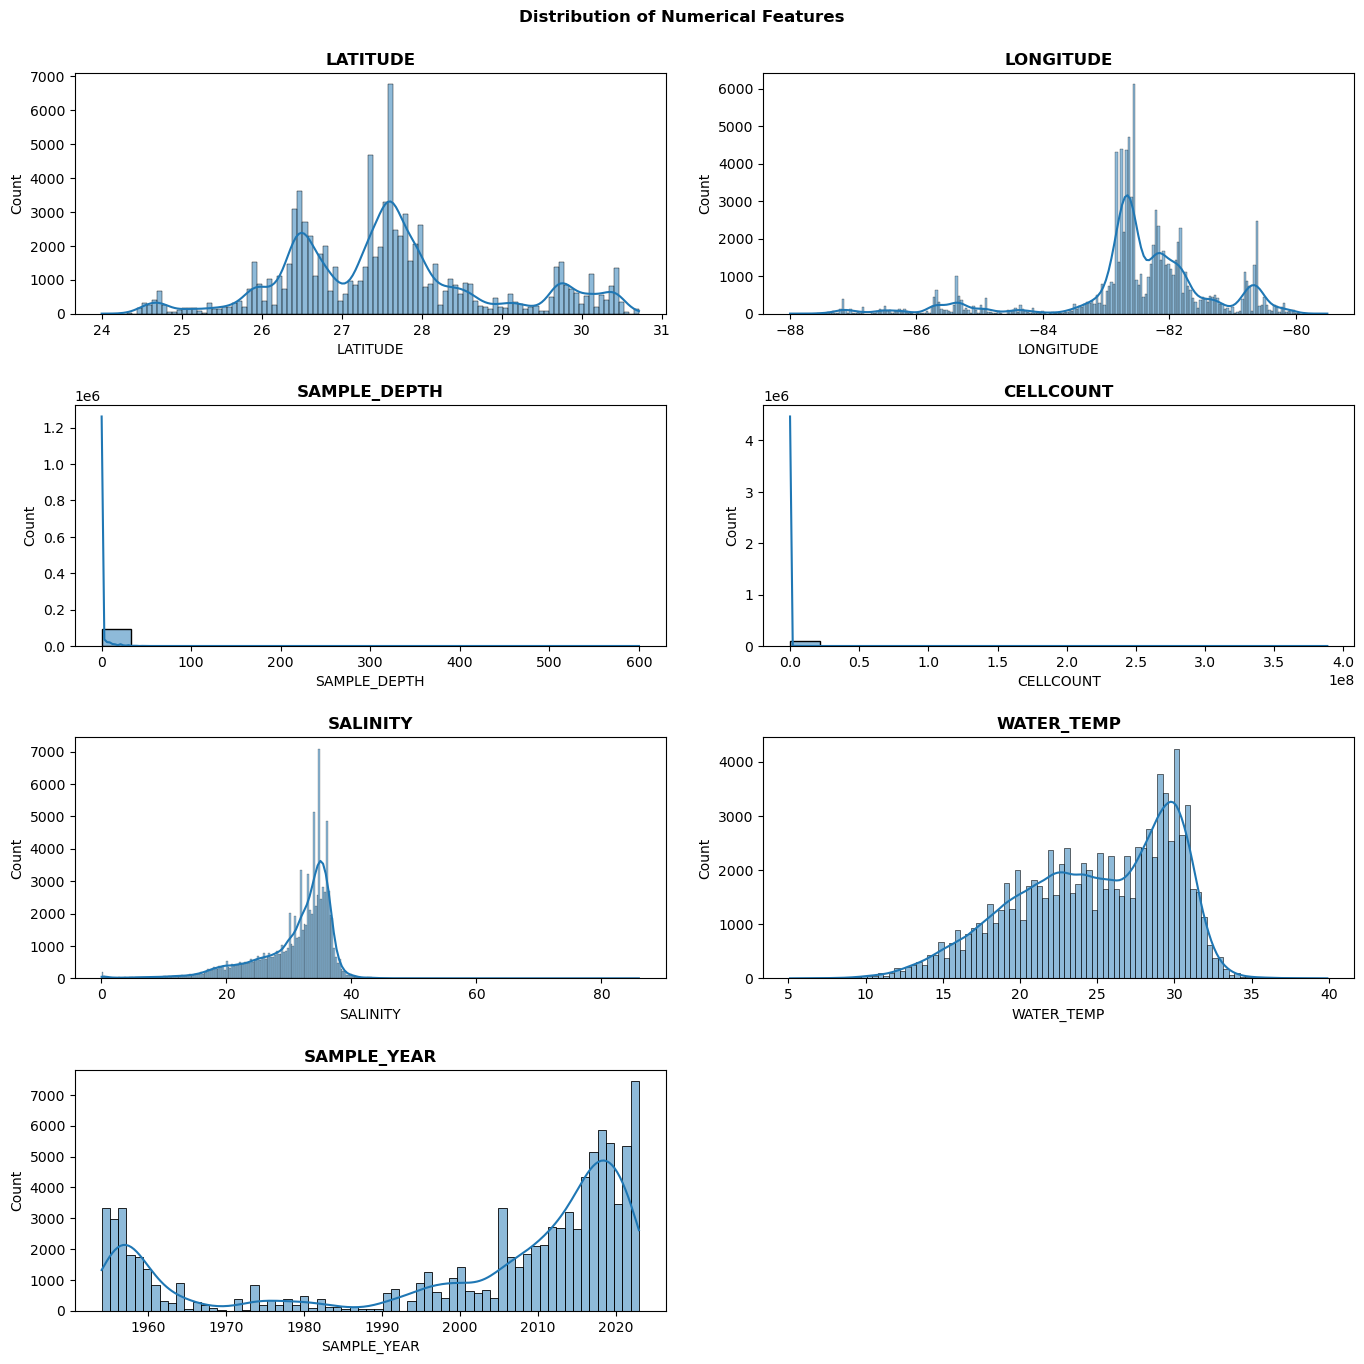

In [118]:
plt.figure(figsize=(14,14))
plt.suptitle("Distribution of Numerical Features", fontweight='bold')

for i, col in enumerate(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1)):
    plt.subplot(4,2, i+1)
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f"{col}", fontweight='bold')
    plt.tight_layout(pad=2)

### Checking the skewness of each feature

In [119]:
def check_skewness(df, col):
    skewness= df[col].skew()
    print(f"Skewness of {col} : {skewness}")

In [120]:
check_skewness(numerical_df, num_cols)

Skewness of Index(['LATITUDE', 'LONGITUDE', 'SAMPLE_DEPTH', 'CELLCOUNT', 'SALINITY',
       'WATER_TEMP', 'SAMPLE_MONTH_NUMBER', 'SAMPLE_YEAR'],
      dtype='object') : LATITUDE                 0.402587
LONGITUDE               -1.301157
SAMPLE_DEPTH            25.228798
CELLCOUNT              148.082252
SALINITY                -1.647190
WATER_TEMP              -0.484286
SAMPLE_MONTH_NUMBER     -0.112242
SAMPLE_YEAR             -1.077931
dtype: float64


Interpretation of skewness results

- LATITUDE(0.402587): The positive skewness indicates that most latitude values are concentrated toward the lower end, with a few higher values extending the tail to the right. This suggests that there may be a larger number of samples at lower latitudes with fewer samples at higher latitudes.

- LONGITUDE(-1.301157): The negative skewness suggests that most longitude values are concentrated on the higher end, with a tail extending to the left. This means there are more values at the eastern longitudes, with some western longitudes pulling the average down.

- SAMPLE_DEPTH(25.228798): A positive skewness indicates that most sample depths are relatively shallow, with some deeper samples extending the tail to the right. This could imply that the majority of data is collected from shallow areas, while deeper areas are less frequently sampled.

- CELLCOUNT(148.082252): The positive skewness suggests that the majority of cell count values are lower, with a few higher counts extending the tail to the right. This might indicate that most samples have low to moderate cell counts, while a few samples have significantly higher counts.

- SALINITY(-1.647190): The negative skewness indicates that most salinity values are on the higher end, with some lower values extending the tail to the left. This suggests that there might be a prevalence of higher salinity readings, with fewer instances of very low salinity.

- WATER_TEMP(-0.484286): The negative skewness suggests that water temperature values are concentrated toward the higher end, with a tail extending to the left. This means that most water temperatures are higher, with a few lower temperatures creating the left tail.

- SAMPLE_YEAR(-1.077931): The distribution is left-skewed, with a longer tail on the left side. This suggests that the majority of the sample years are concentrated towards the more recent or higher end, while there are fewer older years pulling the average down.

### Univariate analysis of categorical variables. count plots of each feature with labels, pie charts if necessary

In [121]:
categorical_df.describe(include='object').T

,count,unique,top,freq
STATE_ID,92043,1,FL,92043
DESCRIPTION,92043,8752,New Pass Dock (Sarasota Bay),1400
SAMPLE_TIME,92043,1324,00:00:00,4705
GENUS,92043,1,Karenia,92043
SPECIES,92043,1,brevis,92043
CATEGORY,92043,5,not observed,75046
SAMPLE_MONTH_NAME,92043,12,Oct,9065


Key Insights
- Only one type of Genus(Karenia) and one type of species(brevis)
- There re 4 different states in consideration. Florida, Texas, Alabama and Missisipi
- 5 different types of cellcount categories (not observed, very low, low, medium, high)
- 8752 unique locations

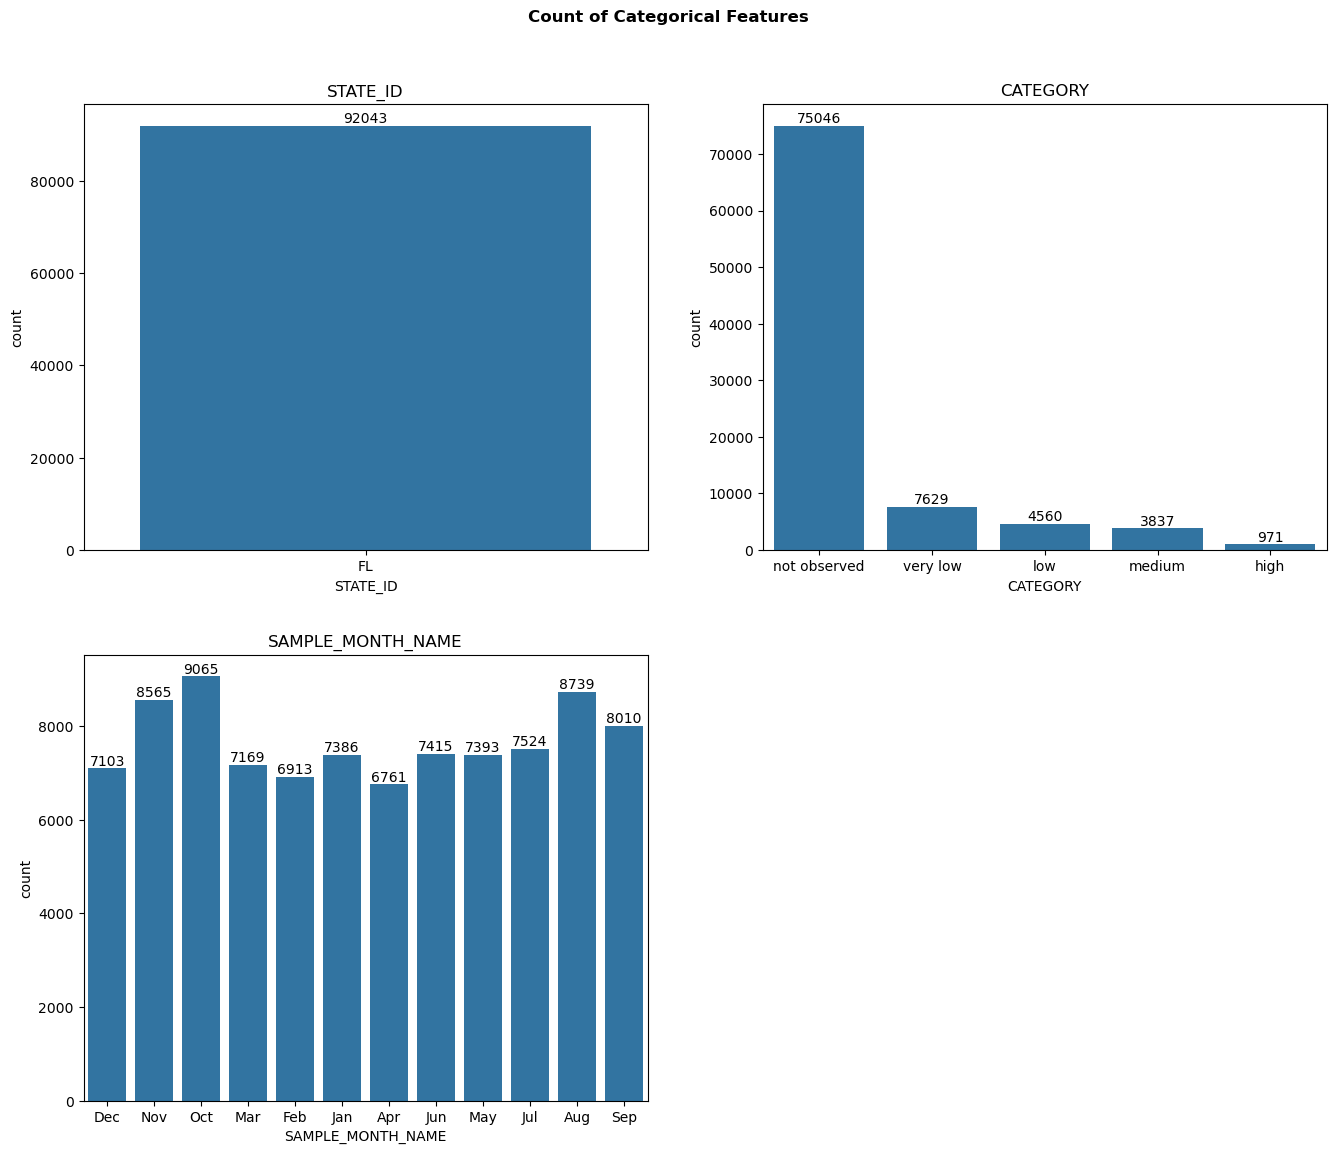

In [123]:
plt.figure(figsize=(14,12))
plt.suptitle("Count of Categorical Features", fontweight='bold')

for i, col in enumerate(categorical_df.drop(["SAMPLE_DATE", "SAMPLE_TIME", "DESCRIPTION", "SPECIES", "GENUS"], axis=1)):
    plt.subplot(2,2, i+1)
    ax= sns.countplot(x=categorical_df[col])
    ax.bar_label(ax.containers[0])
    plt.title(f"{col}")
    plt.tight_layout(pad=3)
    

### Bivariate analysis of numerical varibles, scatter plots, correlation heatmaps

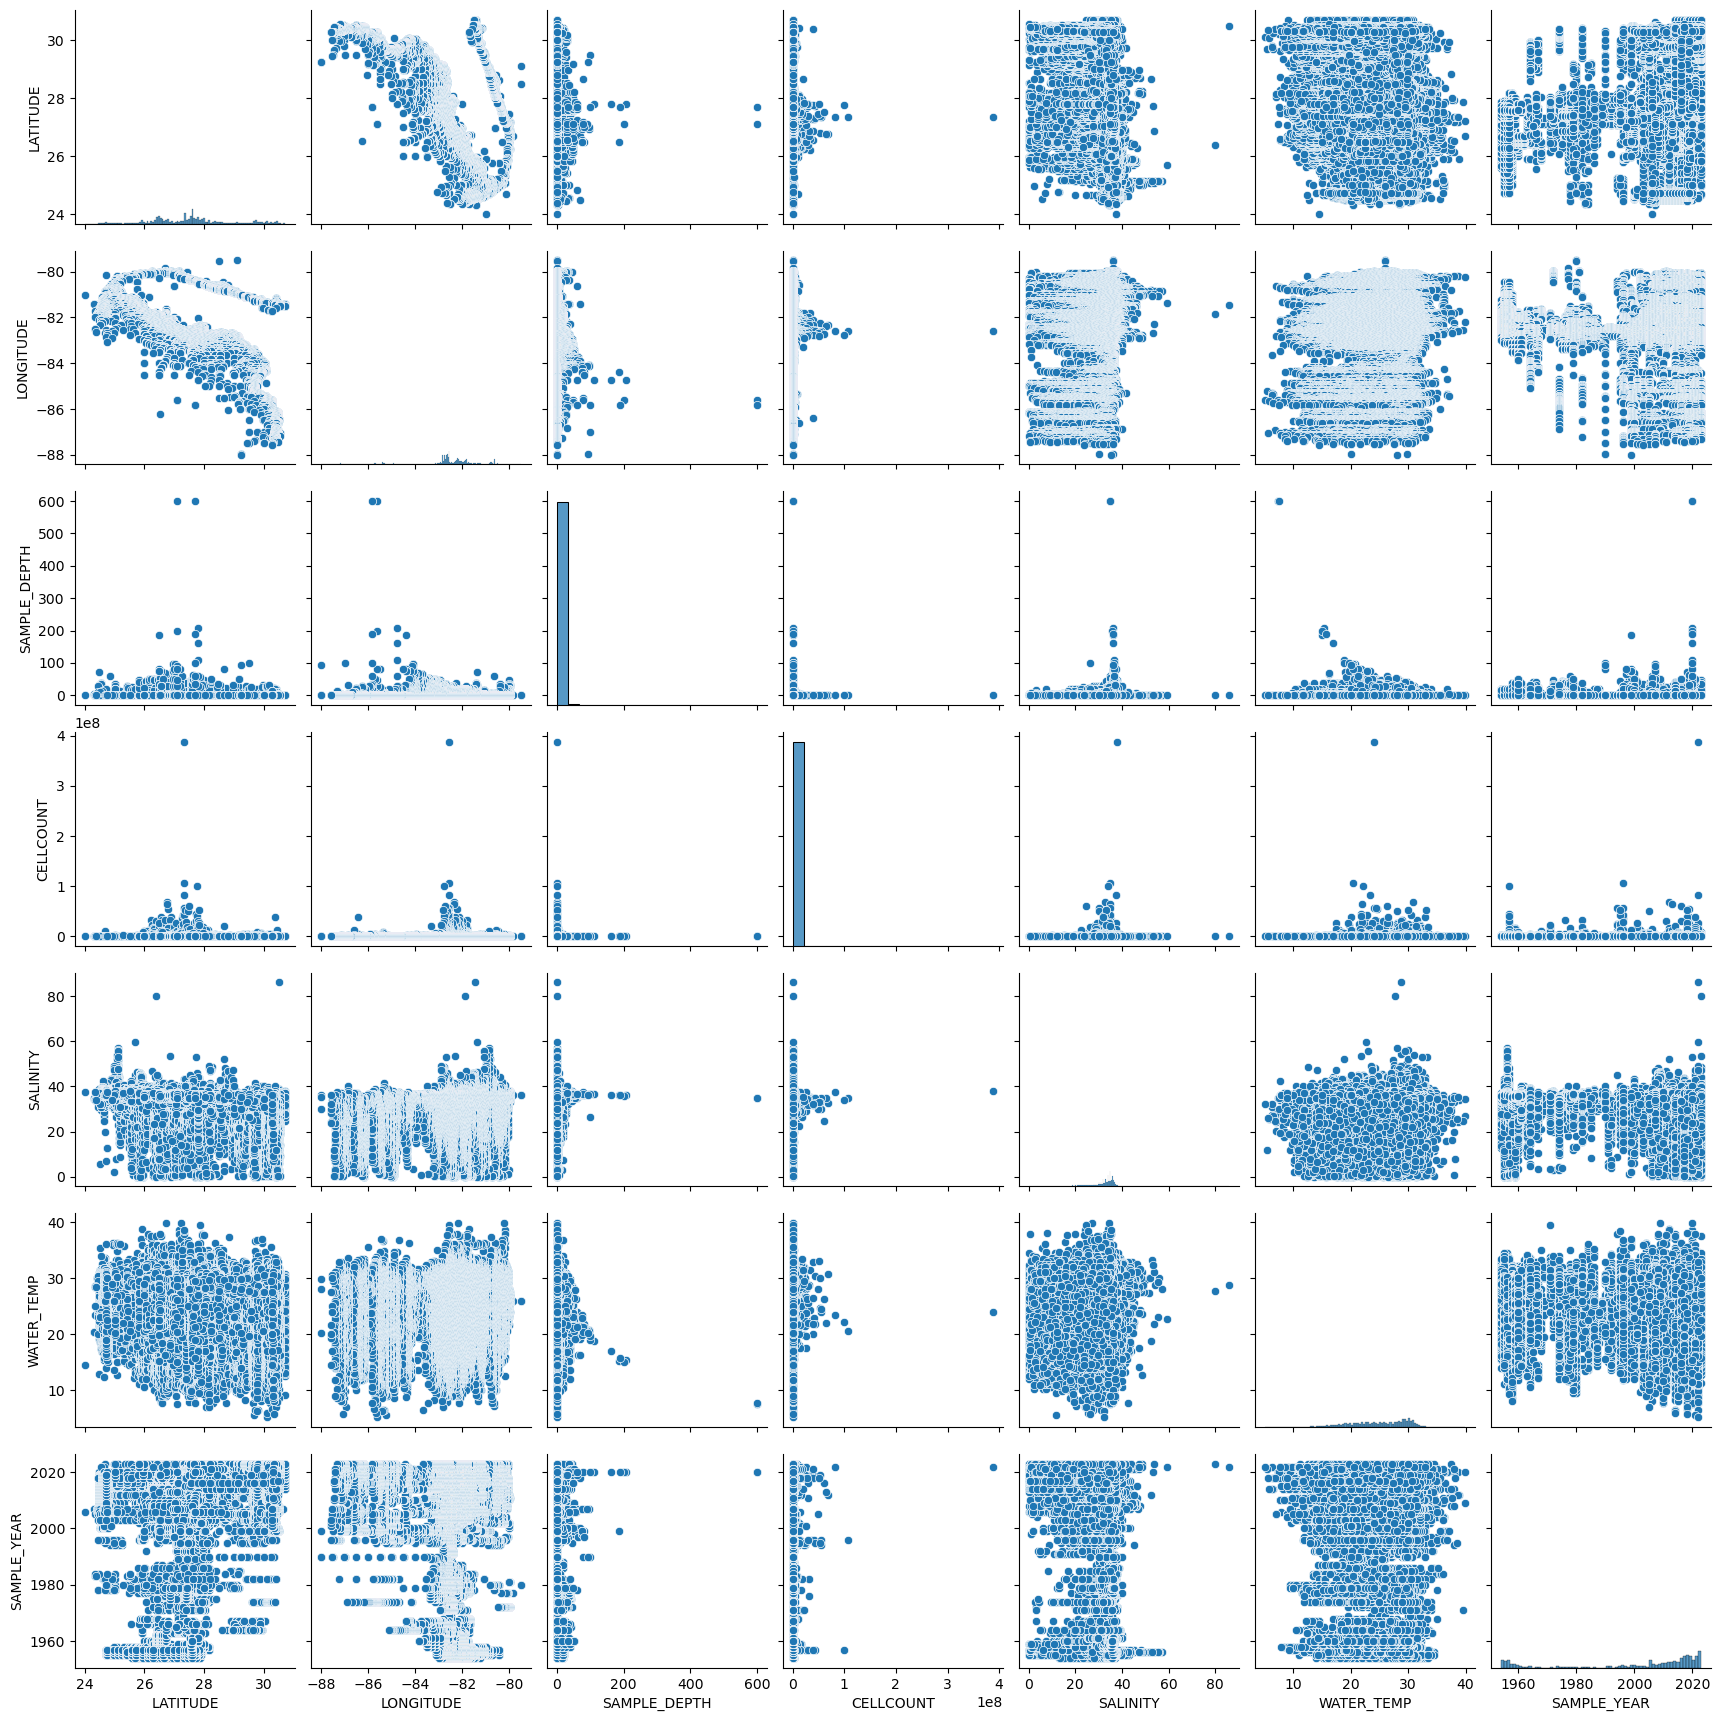

In [124]:
#Pairplot of numerical features

sns.pairplot(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1))

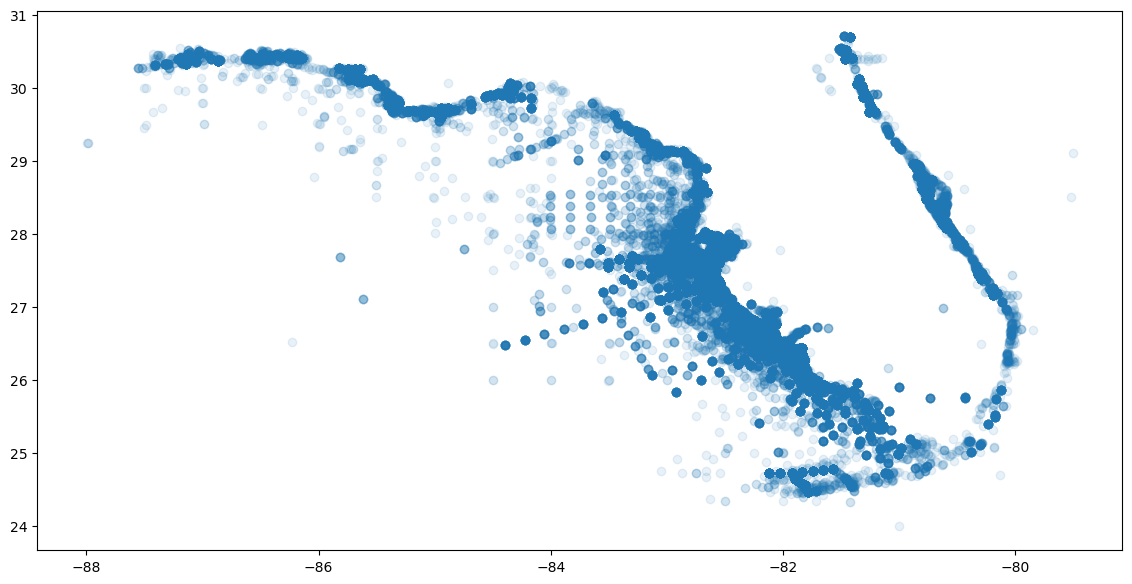

In [125]:
#Longitude vs Latitude

plt.figure(figsize= (14,7))
plt.scatter(x= numerical_df["LONGITUDE"], y=numerical_df["LATITUDE"], alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("LONGITUDE vs LATIT")

Most of the data was collected along the coast of Florida

### Bivariate Analysis of categorical variables, count plots with hues

### Bivariate analysis of numerical variables and categorical variables

### Multivariate analysis